# Import Libraries



In [1]:
# prompt: read the csv file from the link https://drive.google.com/file/d/1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53/view?usp=sharing
# NEW https://drive.google.com/file/d/16eg27ZDsBJMYjyYlUTGvjFxFP-cHam2p/view?usp=sharing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import string
from sklearn.linear_model import LinearRegression

import pandas as pd

# Download the CSV file from Google Drive
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1dHA4H4MzVna6dHIZDT7OaD067rUZ1wU3&export=download&authuser=0&confirm=t&uuid=366f17e2-c42f-4ba6-8d92-44c6fa0ff0cc&at=AIrpjvNk5wimIx1iw0l95MZFUorE:1736488360674' -O data.csv

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('data.csv')
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file was downloaded correctly.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--2025-01-10 12:12:22--  https://drive.usercontent.google.com/download?id=1dHA4H4MzVna6dHIZDT7OaD067rUZ1wU3&export=download&authuser=0&confirm=t&uuid=366f17e2-c42f-4ba6-8d92-44c6fa0ff0cc&at=AIrpjvNk5wimIx1iw0l95MZFUorE:1736488360674
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51171 (50K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]  49.97K  --.-KB/s    in 0.001s  

2025-01-10 12:12:24 (82.7 MB/s) - ‘data.csv’ saved [51171/51171]

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4

# **To show some data according to dataset**

In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,3.9,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# **Data Preparation**


In [ ]:
# Assuming 'df' is my DataFrame
#Renaming columns for consistency
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
#Handling inconsistent author names
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
#Calculating book title length (excluding spaces)
df['name_len'] = df['Name'].str.len() - df['Name'].str.count(" ")  # More efficient
# built-in string in Python containing common punctuation characters.
punctuations = string.punctuation
print('list of punctuations : ' , punctuations)


#percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)


#apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# **Visualize the data according to the Genre**

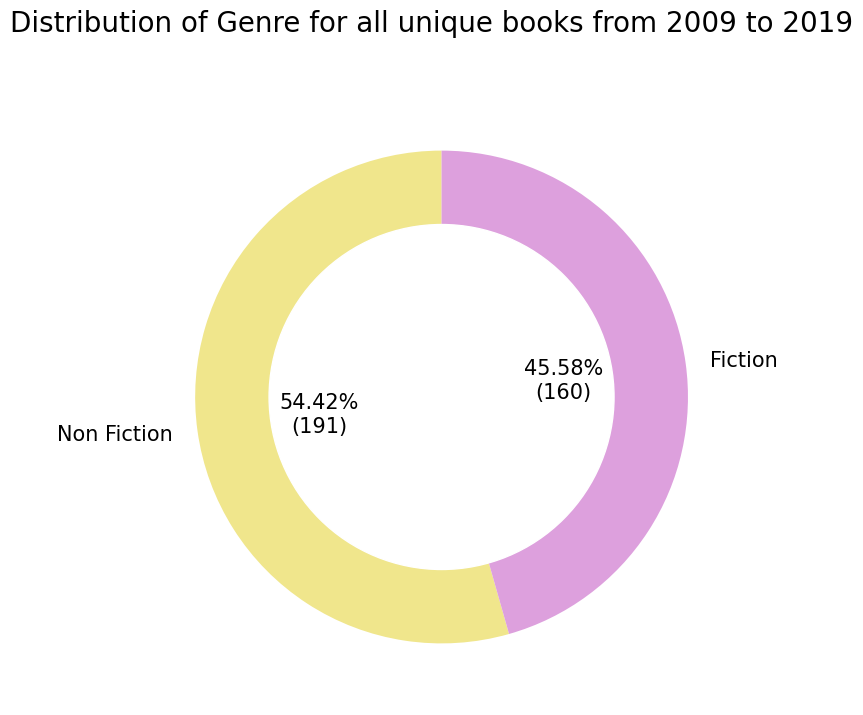

In [ ]:
# Handle duplicates properly using the correct DataFrame
no_dup = df.drop_duplicates('Name')
# Count genres after dropping duplicates
g_count = no_dup['Genre'].value_counts()
# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
#Matplotlib's pie chart function to customize the labels displayed on the pie slices
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        #formatting the label that will be displayed on the pie slice.
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct
# Define colors for the genres
#genre_col = ['navy','crimson']
genre_col = ['khaki','plum']
# Create a center circle for a donut chart
center_circle = plt.Circle((0, 0), 0.7, color='white')
# Create the pie chart
plt.pie(
    x=g_count.values,
    labels=g_count.index,
    autopct=make_autopct(g_count.values),
    startangle=90,
    textprops={'size': 15},
    pctdistance=0.5,
    colors=genre_col
)
# Add the center circle
ax.add_artist(center_circle)
# Add title and display the plot
fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

# **Now Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019**

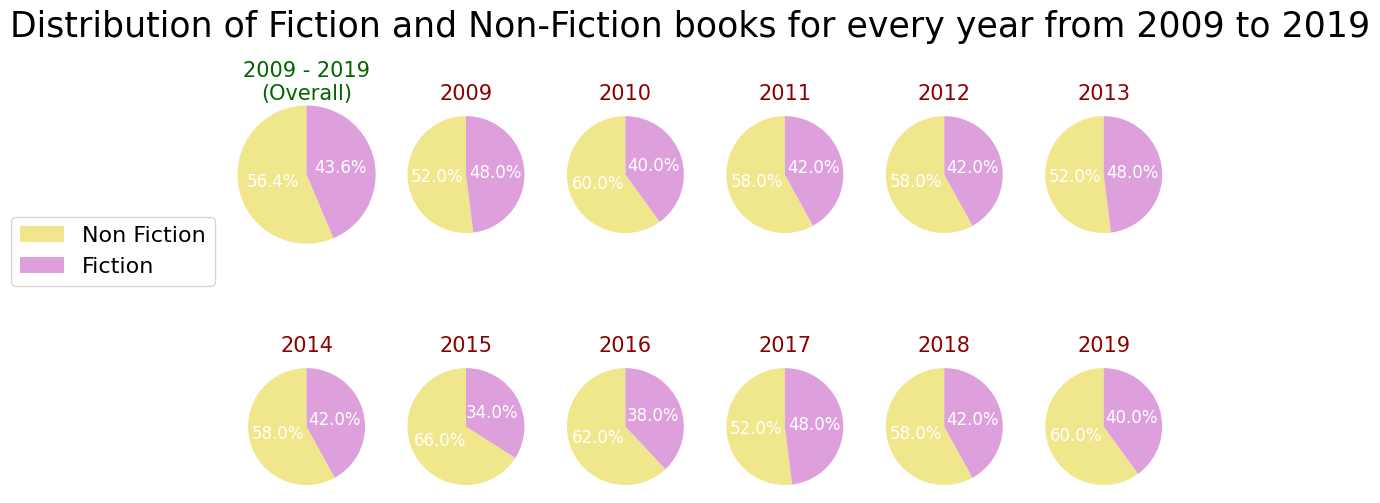

In [ ]:

#creates a NumPy array y1 containing the years from 2009 to 2013 (inclusive)
y1 = np.arange(2009, 2014)
#creates another NumPy array y2 containing the years from 2014 to 2019 (inclusive)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()
# for 1st circle
fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})
#creates circles for the years from 2009 to 2013 (inclusive)
for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                  startangle=90, textprops={'size': 12,'color': 'white'},
                  pctdistance=0.5, colors=genre_col, radius=1.1)
#creates circles for the years from 2014 to 2019 (inclusive)
for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})
# Add title and display the plot
plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             fontsize=25)
# for mini dashboard
fig.legend(g_count.index, loc='center left', fontsize=16)

fig.show()

# **look at the top 10 bestselling authors of both fiction and non-fiction categories**

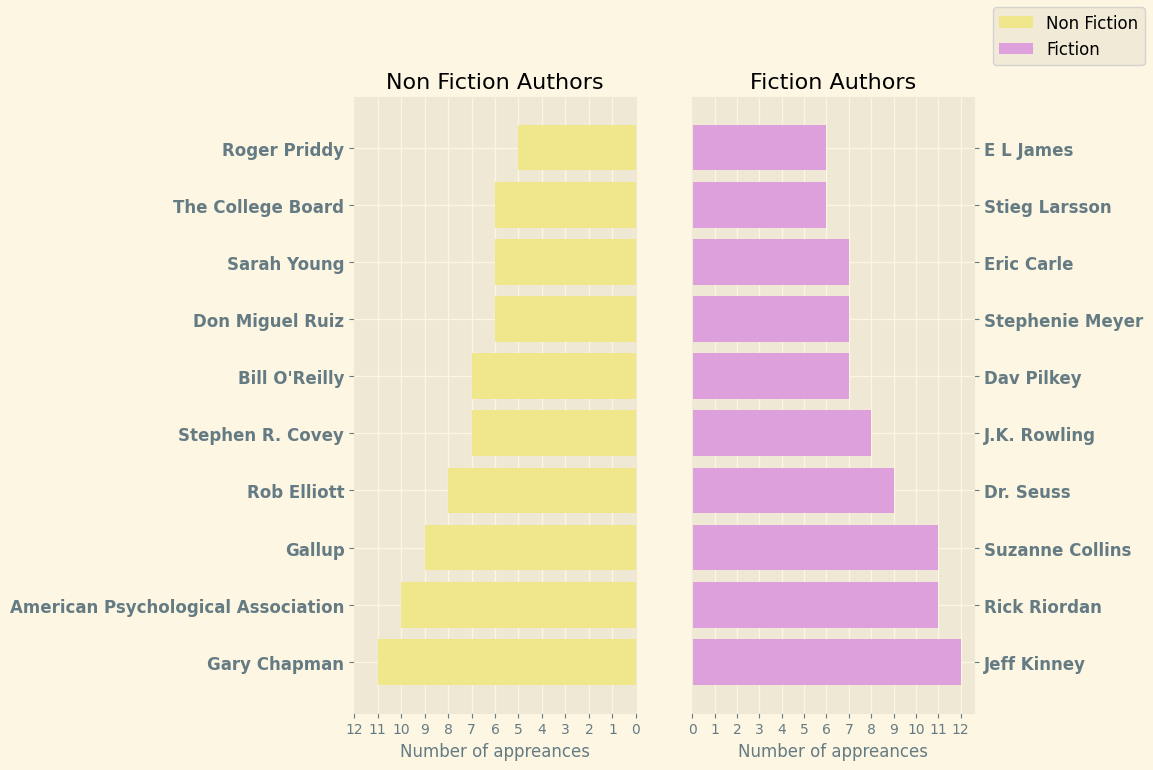

In [ ]:
#calculates the top 10 Non-Fiction authors based on the number of times their books appear in the dataset
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:10]
#calculates the top 10 Fiction authors based on the number of times their books appear in the dataset.
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:10]

#the 'Solarize_Light2' style to the plot for a specific visual theme.
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))

# creates a horizontal bar chart on the first subplot (ax[0]) for Non-Fiction authors.
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    # reverses the x-axis so the bars go from right to left.
    ax[0].invert_xaxis()
    # places y-axis ticks on the left.
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
# For Non-Fiction subplot
    ax[0].set_yticks(np.arange(len(best_nf_authors.index)))  # Set tick locations
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')

#creates and customizes the horizontal bar chart on the second subplot (ax[1]) for Fiction authors
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
# For Fiction subplot
    ax[1].set_yticks(np.arange(len(best_f_authors.index)))  # Set tick locations
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
#add a legend to the figure, indicating the colors used for Non-Fiction and Fiction
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
#displays the created figure with the two subplots
plt.show()

# **Top-selling authors are selected based on their appearances in the top 50 best-selling books each year**

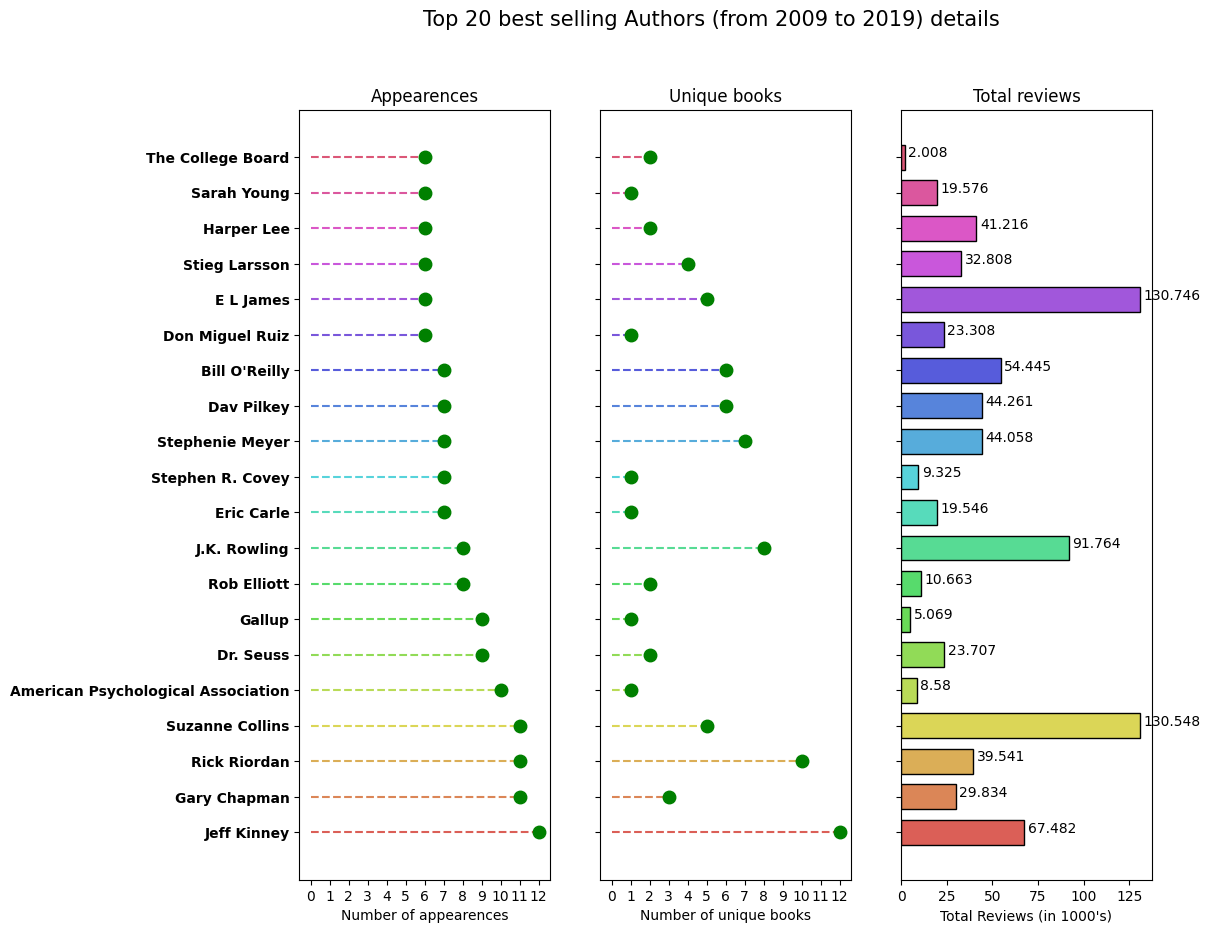

In [ ]:
#appearances includes duplicate book names. Their unique posts and overall reviews
# Set the number of top authors to consider
n_best = 20
# Calculate the top 20 authors based on the frequency of their appearanc
top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

# Create a figure with 3 subplots arranged horizontally, sharing the y-axis
fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

# Generate a color palette for visualizing the authors
color = sns.color_palette("hls", n_best)

# --- Subplot 1: Number of Appearances ---
ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
# Before setting yticklabels
ax[0].set_yticks(np.arange(len(top_authors.index)))  # Set tick locations
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

# --- Subplot 2: Number of Unique Books ---
# Initialize lists to store book count and total reviews
book_count = []
total_reviews = []
# Iterate through the top authors
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
# Plot horizontal lines for the number of unique books
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
# Add circular markers to the subplot
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

# --- Subplot 3: Total Reviews ---
# Create a horizontal bar chart for total reviews
ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)

# Add text labels to the bars showing total reviews
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)

ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
# Display the plot
plt.show()

# **Temporal Trend Analysis for next 5 years using Linear Regression**





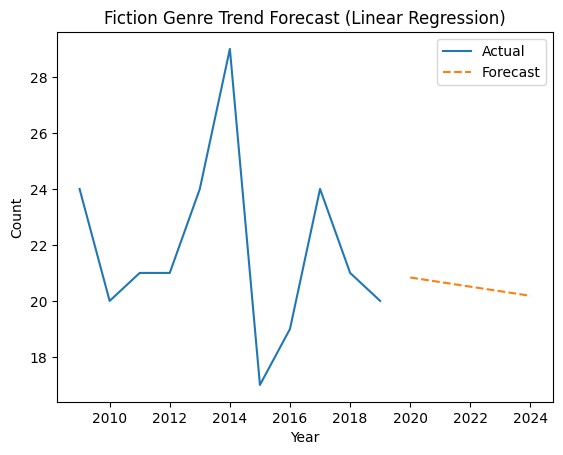

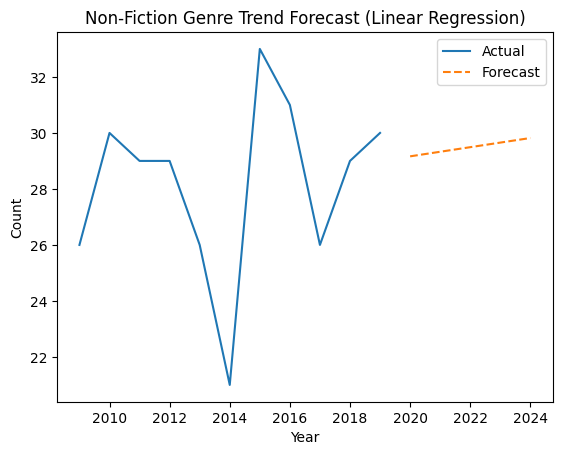

In [ ]:
#Temporal Trend Analysis

# Assuming the column is named 'Year' based on my data
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year  # Extract year
# If it's 'Publication Year' then use:
# data['Year'] = pd.to_datetime(data['Publication Year'], format='%Y').dt.year


# Aggregate by year and genre
trend_data = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# Forecasting with Linear Regression
genre_trends = trend_data[trend_data['Genre'] == 'Fiction']
# Forecasting with Linear Regression for Non-Fiction
genre_trends_nf = trend_data[trend_data['Genre'] == 'Non Fiction'] # Filter for Non-Fiction

# Prepare data for linear regression for fiction
X = genre_trends['Year'].values.reshape(-1, 1)
y = genre_trends['Count'].values

# Prepare data for linear regression for non-fiction
X_nf = genre_trends_nf['Year'].values.reshape(-1, 1)  # Create X_nf
y_nf = genre_trends_nf['Count'].values  # Create y_nf

# Create and fit the model for fiction
model = LinearRegression()
model.fit(X, y)

# Create and fit the model for non fiction
model_nf = LinearRegression()
model_nf.fit(X_nf, y_nf)

# Forecast for the next 5 years for fiction
future_years = [[year] for year in range(df['Year'].max() + 1, df['Year'].max() + 6)]
forecast_counts = model.predict(future_years)

# Forecast for the next 5 years for non fiction
future_years_nf = [[year] for year in range(df['Year'].max() + 1, df['Year'].max() + 6)]
forecast_counts_nf = model_nf.predict(future_years_nf)

# Plot for fiction
plt.plot(genre_trends['Year'], genre_trends['Count'], label='Actual')
plt.plot(range(df['Year'].max() + 1, df['Year'].max() + 6), forecast_counts, label='Forecast', linestyle='--')
plt.title('Fiction Genre Trend Forecast (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()
# Plot for Non-Fiction
plt.plot(genre_trends_nf['Year'], genre_trends_nf['Count'], label='Actual')
plt.plot(range(df['Year'].max() + 1, df['Year'].max() + 6), forecast_counts_nf, label='Forecast', linestyle='--')
plt.title('Non-Fiction Genre Trend Forecast (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

# **Visualization of Top 10 Books Based on User Ratings and reviews**

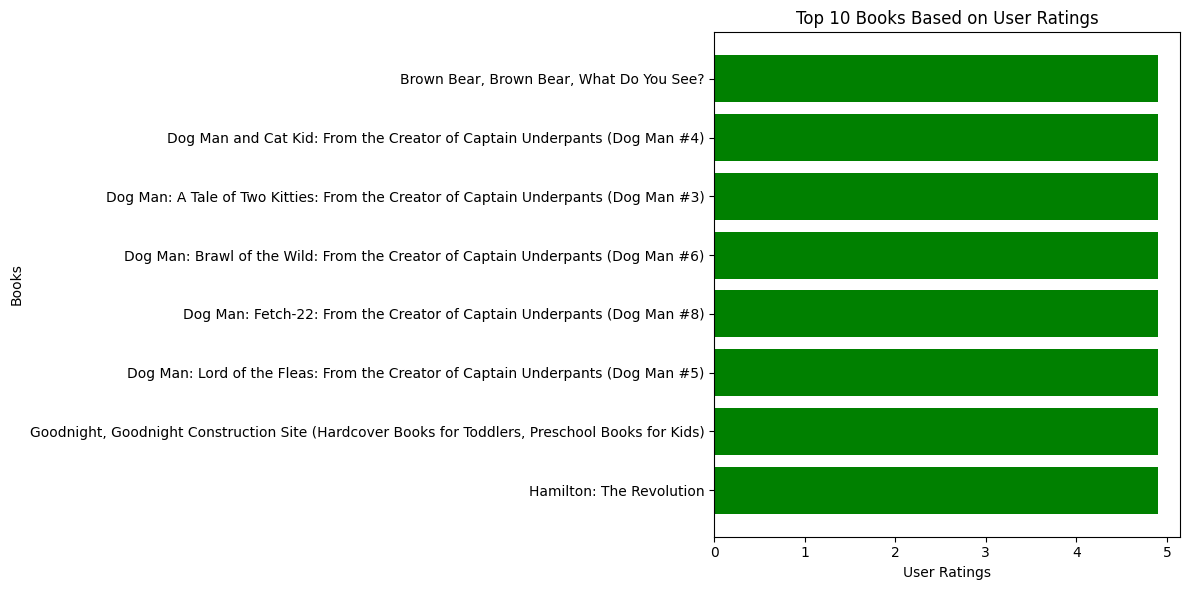

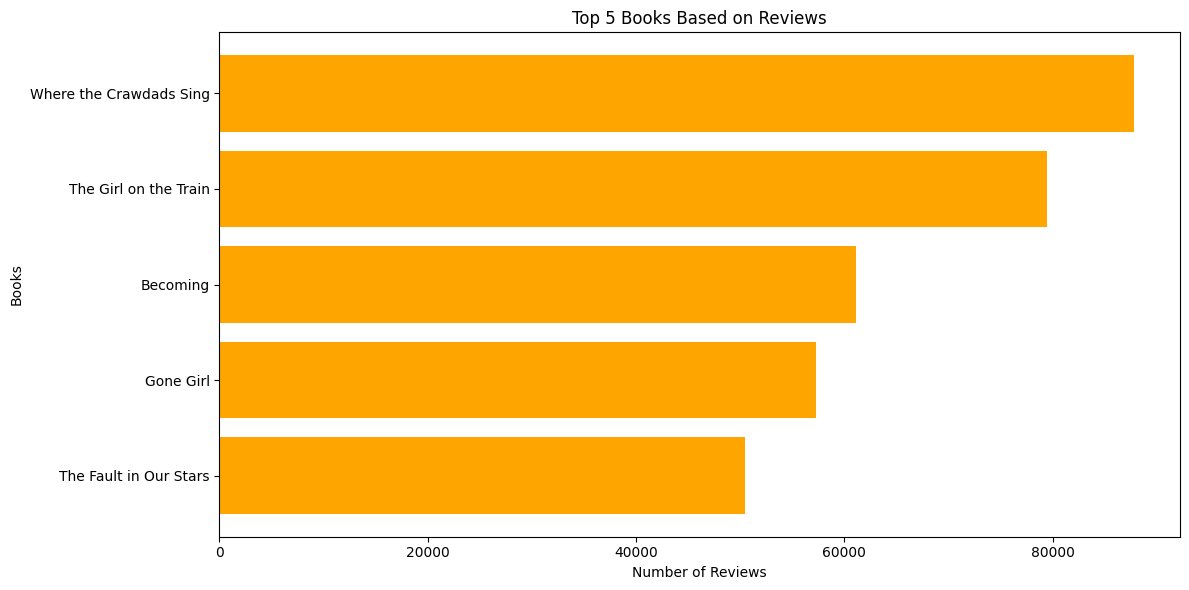

In [ ]:
# Sort and filter the top 10 books based on user ratings
top_rated_books = df.nlargest(10, 'User_Rating')  # Change 'User Rating' to 'User_Rating'

# Sort and filter the top 10 books based on reviews
top_reviewed_books = df.nlargest(10, 'Reviews')

# Plot Top 10 Books Based on User Ratings
plt.figure(figsize=(12, 6))
plt.barh(
    top_rated_books['Name'],  # Assuming 'Name' is the column for book titles
    top_rated_books['User_Rating'], # Changed 'User Ratings' to 'User_Rating'
    color='green'
)
plt.xlabel('User Ratings')
plt.ylabel('Books')
plt.title('Top 10 Books Based on User Ratings')
plt.gca().invert_yaxis()  # Highest rated books on top
plt.tight_layout()
plt.show()

# Plot Top 10 Books Based on Reviews
plt.figure(figsize=(12, 6))
plt.barh(
    top_reviewed_books['Name'], # Assuming 'Name' is the column for book titles
    top_reviewed_books['Reviews'],
    color='orange'
)
plt.xlabel('Number of Reviews')
plt.ylabel('Books')
plt.title('Top 5 Books Based on Reviews')
plt.gca().invert_yaxis()  # Most reviewed books on top
plt.tight_layout()
plt.show()

# **Distribution of Positive and Negative Book Reviews**

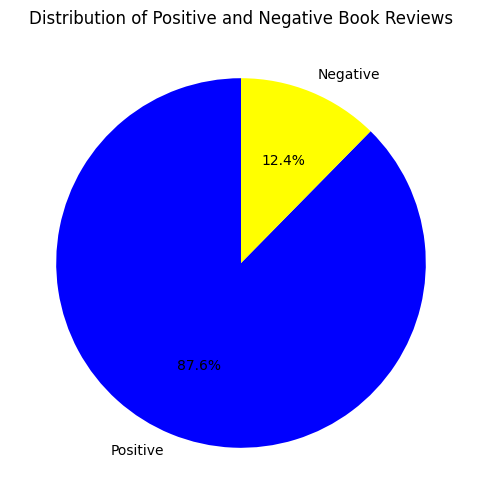

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Define Positive and Negative Reviews
df['Review_Type'] = df['User_Rating'].apply(lambda rating: 'Positive' if rating >= 4 else 'Negative') # Changed 'User Rating' to 'User_Rating'

# 2. Calculate the Proportion of Positive and Negative Reviews
review_counts = df['Review_Type'].value_counts()

# 3. Create the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow'])
plt.title('Distribution of Positive and Negative Book Reviews')
plt.show()

# **Apply the K-Means algorithm to cluster books based on their price and review counts**

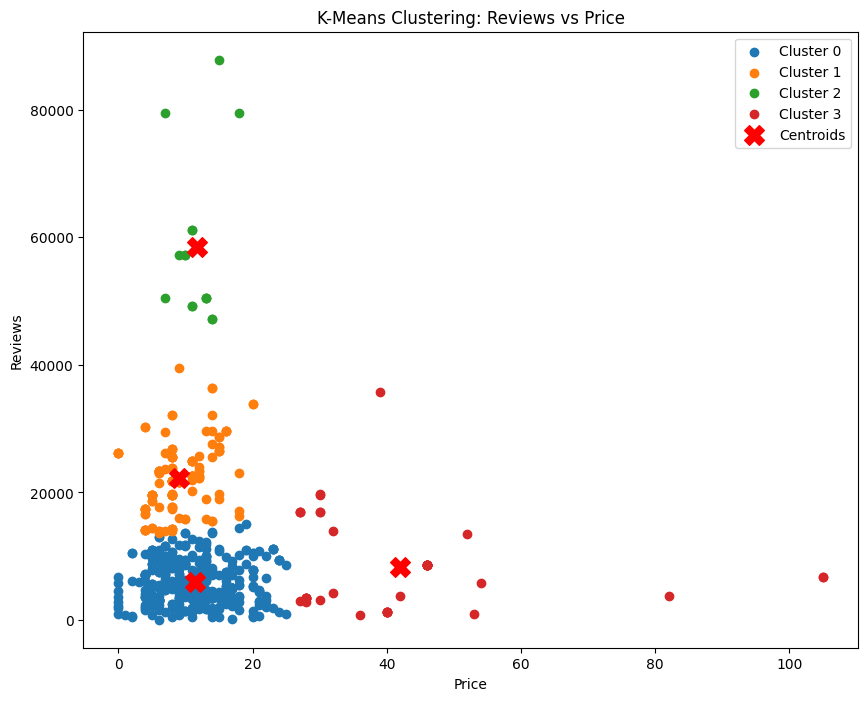

Cluster Centers (Unscaled):
[[1.14885057e+01 5.97831609e+03]
 [8.97931034e+00 2.22050414e+04]
 [1.16875000e+01 5.84903750e+04]
 [4.19024390e+01 8.25058537e+03]]

Cluster Assignments:
                                                 Name  Price  Reviews  Cluster
0                       10-Day Green Smoothie Cleanse      8    17350        1
1                                   11/22/63: A Novel     22     2052        0
2             12 Rules for Life: An Antidote to Chaos     15    18979        1
3                              1984 (Signet Classics)      6    21424        1
4   5,000 Awesome Facts (About Everything!) (Natio...     12     7665        0
5       A Dance with Dragons (A Song of Ice and Fire)     11    12643        0
6   A Game of Thrones / A Clash of Kings / A Storm...     30    19735        3
7                      A Gentleman in Moscow: A Novel     15    19699        1
8       A Higher Loyalty: Truth, Lies, and Leadership      3     5983        0
9                          

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
df_cluster = df[['Price', 'Reviews']]

# Handle missing values by filling with the mean
df_cluster = df_cluster.fillna(df_cluster.mean())

# Step 1: Data Preprocessing
# Standardize the data to bring features to a similar scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Step 2: Apply K-Means Clustering
# Choose the number of clusters (k)
k = 4  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto') # Added n_init to suppress warning
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 3: Visualize Clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Price'], cluster_data['Reviews'], label=f"Cluster {cluster}")

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering: Reviews vs Price")
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.legend()
plt.show()

# Step 4: Analyze Clusters
print("Cluster Centers (Unscaled):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

print("\nCluster Assignments:")
print(df[['Name', 'Price', 'Reviews', 'Cluster']].head(20))

# **Actual vs. Predicted User Ratings by using Random Forest Regresson**

Mean Squared Error: 0.12437614099526759
R-squared Value: -0.2134355496055098


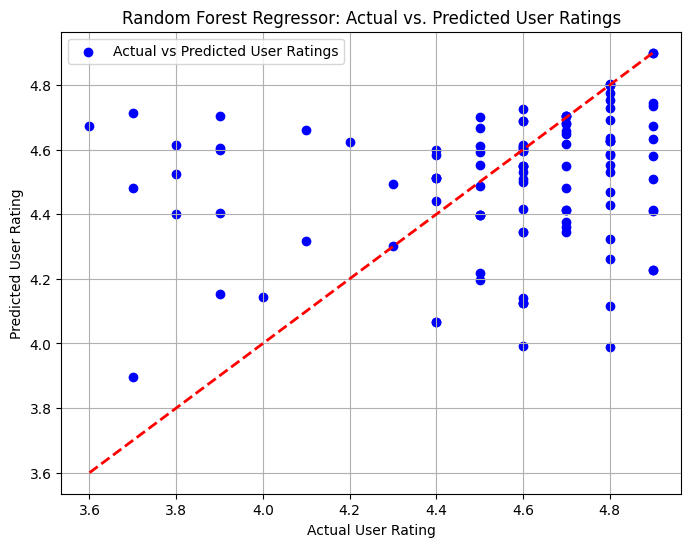

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Select features and target variable
df_tree = df[['Price', 'Reviews', 'User_Rating']] # Changed 'User Rating' to 'User_Rating'

# Handle missing values by filling with the mean
df_tree = df_tree.fillna(df_tree.mean())

X = df_tree[['Price', 'Reviews']] # Features: Price and Reviews
y = df_tree['User_Rating']      # Target: User_Rating # Changed 'User Rating' to 'User_Rating'

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train a Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = model.predict(X_test)

# Step 3: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

# Step 4: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted User Ratings')
plt.xlabel("Actual User Rating")
plt.ylabel("Predicted User Rating")
plt.title("Random Forest Regressor: Actual vs. Predicted User Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()



# **Applying Decison Tree Algorithm to find a user will buy a fiction or non-fiction book and accuracy**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Data Preprocessing
# Handle missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Prepare Features and target
# Changed 'User Rating' to 'User_Rating' to match the renamed column
X = df[['Price', 'User_Rating', 'Reviews']]  # Numerical Features
y = df['Genre']  # Target
# Encode the Target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Training
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

# 3. New Event Prediction

# Example of a new book: features (Price, User Rating, Reviews)
# new_book_data = pd.DataFrame({'Price': [11], 'User_Rating': [4], 'Reviews': [1000]})  # Original line with error
# Here is an example of a new fiction book
# new_book_data = pd.DataFrame({'Price': [10], 'User_Rating': [4.8], 'Reviews': [5000]}) # Original line with error

# Create the new_book_data DataFrame with the correct column name 'User_Rating'
new_book_data = pd.DataFrame({'Price': [10], 'User_Rating': [4.8], 'Reviews': [5000]})
predicted_genre_encoded = model.predict(new_book_data)
predicted_genre = label_encoder.inverse_transform(predicted_genre_encoded) # Convert back to Genre

print("Predicted Genre:", predicted_genre)

# Evaluate the model (optional, but good practice)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Predicted Genre: ['Fiction']
Accuracy:  0.7181818181818181


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # Import matplotlib.pyplot



# Features (you might need to adjust these based on your data exploration)
features = ['Price','Reviews']
X = df[features]
y = df['Genre']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)  # Use the same encoder for test data

# Create and train the Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Visualize the Decision Tree
plt.figure(figsize=(100, 50)) # Ensure matplotlib.pyplot is imported as plt

plot_tree(model,
          feature_names=features,
          class_names=le.classes_,
          filled=True,
          rounded=True)

plt.show() # Add plt.show() to display the plot

Output hidden; open in https://colab.research.google.com to view.